In [1]:
# Importar las bibliotecas necesarias y configurar estilo de gráficos
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Configurar fondo rosado y estilo de las gráficas
plt.rcParams['axes.facecolor'] = '#FFB6C1'  # Fondo rosado
plt.rcParams['axes.edgecolor'] = 'gray'
plt.rcParams['grid.color'] = 'white'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titleweight'] = 'bold'

In [2]:
# Definir la matriz de distancias y los nombres de los patrones

# La matriz de distancias proporcionada es simétrica, así que solo necesitamos la mitad inferior sin la diagonal.
# La estructura que usaremos será una lista unidimensional compatible con el método 'linkage'.
distancias = np.array([1.5, 2.5, 3, 10, 2.25, 6, 4, 8, 7.5, 3.62])

# Los nombres de los patrones, representados como etiquetas para el dendograma
patrones = ['A', 'B', 'C', 'D', 'E']

# Mostrar la matriz de distancias para asegurarnos de que se ha definido correctamente
print("Matriz de distancias:\n", distancias)


Matriz de distancias:
 [ 1.5   2.5   3.   10.    2.25  6.    4.    8.    7.5   3.62]


In [3]:
# Aplicar el clustering jerárquico con el método de enlace simple

# Aplicar el método de 'single linkage' (enlace simple) para el clustering
enlace_simple = linkage(distancias, method='single')

# Mostrar el resultado del clustering jerárquico
print("Clustering Jerárquico (Enlace Simple):\n", enlace_simple)

# Cada fila del resultado 'enlace_simple' indica qué dos grupos se han unido y la distancia a la que ocurrió.
# La estructura es: [cluster1, cluster2, distancia, número de elementos en el cluster resultante]


Clustering Jerárquico (Enlace Simple):
 [[0.   1.   1.5  2.  ]
 [2.   5.   2.25 3.  ]
 [3.   6.   3.   4.  ]
 [4.   7.   3.62 5.  ]]


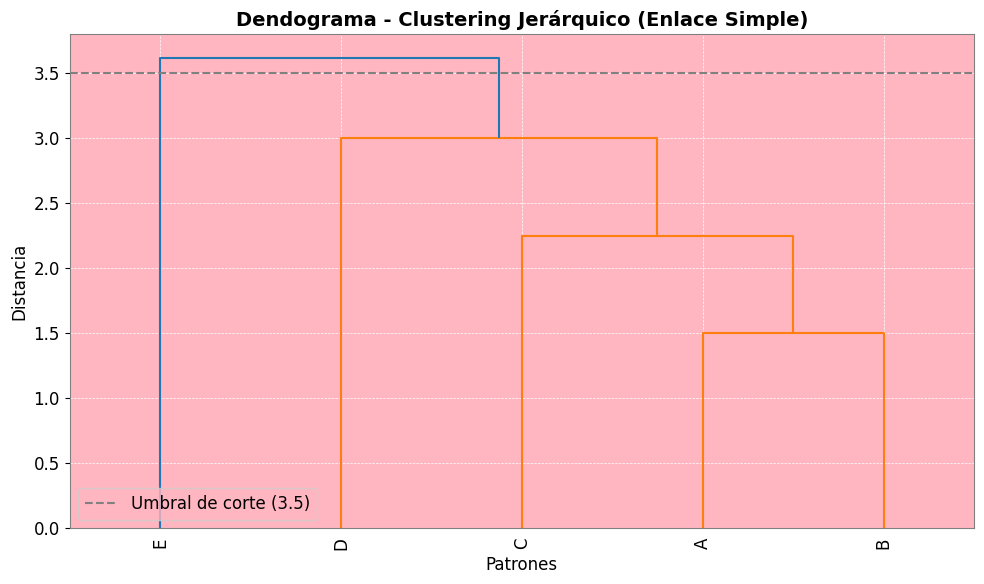

In [10]:
# Graficar el dendograma y explicar cómo interpretarlo

plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico

# Graficar el dendograma con enlace simple
dendrogram(
    enlace_simple,  # Datos del clustering
    labels=patrones,  # Etiquetas de los patrones
    leaf_rotation=90,  # Rotación de las etiquetas
    leaf_font_size=12,  # Tamaño de las etiquetas
    color_threshold=3.5  # Umbral de color en 3.5 para distinguir los clusters
)

# Personalización del gráfico
plt.title('Dendograma - Clustering Jerárquico (Enlace Simple)', fontsize=14, fontweight='bold')
plt.xlabel('Patrones', fontsize=12)
plt.ylabel('Distancia', fontsize=12)
plt.axhline(y=3.5, color='gray', linestyle='--', label='Umbral de corte (3.5)')  # Línea horizontal para el umbral
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Mostrar el dendograma
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()

In [6]:
# Mostrar agrupaciones de patrones con un umbral de distancia

# Elegir un umbral de distancia para definir los clusters
umbral_distancia = 3.5  # Puedes ajustar este valor según lo que quieras analizar

# Generar los clusters usando el umbral de distancia
clusters = fcluster(enlace_simple, t=umbral_distancia, criterion='distance')

# Mostrar las agrupaciones finales de manera más clara
print(f"\nResumen de Agrupaciones (Umbral de distancia = {umbral_distancia}):")
agrupaciones = {}
for i, cluster in enumerate(clusters):
    print(f"Patrón {patrones[i]} está en el cluster {cluster}")
    if cluster not in agrupaciones:
        agrupaciones[cluster] = []
    agrupaciones[cluster].append(patrones[i])

# Mostrar los grupos resultantes de manera resumida
print("\nGrupos resultantes:")
for grupo, patrones_grupo in agrupaciones.items():
    print(f"Grupo {grupo}: {', '.join(patrones_grupo)}")



Resumen de Agrupaciones (Umbral de distancia = 3.5):
Patrón A está en el cluster 1
Patrón B está en el cluster 1
Patrón C está en el cluster 1
Patrón D está en el cluster 1
Patrón E está en el cluster 2

Grupos resultantes:
Grupo 1: A, B, C, D
Grupo 2: E
